In [0]:
import random # for random value
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting 
from PIL import Image # Image processing
import json  #json file I/O
#from mpl_toolkits.basemap import Basemap

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

import sys

Using TensorFlow backend.


In [0]:
from PIL import Image, ImageDraw 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
BDIR = '/content/drive/My Drive/PrjData/Prj_Shipsnet'
with open(BDIR + '/shipsnet.json') as data_file:
    data = json.load(data_file)
Shipsnet= pd.DataFrame(data)
print(Shipsnet.head())
print(Shipsnet.shape)

                                                data  ...             scene_ids
0  [82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...  ...  20180708_180909_0f47
1  [76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...  ...  20170705_180816_103e
2  [125, 127, 129, 130, 126, 125, 129, 133, 132, ...  ...  20180712_211331_0f06
3  [102, 99, 113, 106, 96, 102, 105, 105, 103, 10...  ...  20170609_180756_103a
4  [78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...  ...  20170515_180653_1007

[5 rows x 4 columns]
(4000, 4)


In [0]:
input_data = np.array(data['data']).astype('uint8')
output_data = np.array(data['labels']).astype('uint8')

In [0]:
input_data.shape


(4000, 19200)

In [0]:
n_spectrum = 3 # color channel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape

(3, 80, 80)

In [0]:
# get one channel
pic = X[0]

red_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectrum = pic[2]

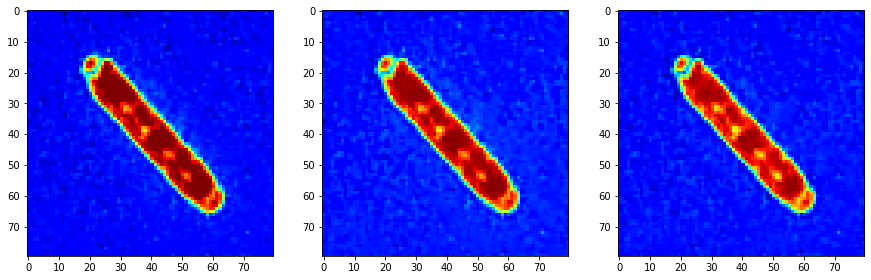

In [0]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(red_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectrum)
    
plt.show()


In [0]:
y = np_utils.to_categorical(output_data, 2)
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
# shuffle all indexes
indexes = np.arange(2800)
np.random.shuffle(indexes)

In [0]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]

In [0]:
X_train = X_train / 255


In [0]:
np.random.seed(42)


In [0]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])


In [0]:
model.layers

In [0]:
  len(model.get_weights()[0][0][0][0])

32

In [0]:
# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

In [0]:
image = Image.open(BDIR + '/scenes/scenes/sfbay_1.png')
pix = image.load()

In [0]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [0]:
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [0]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0) 

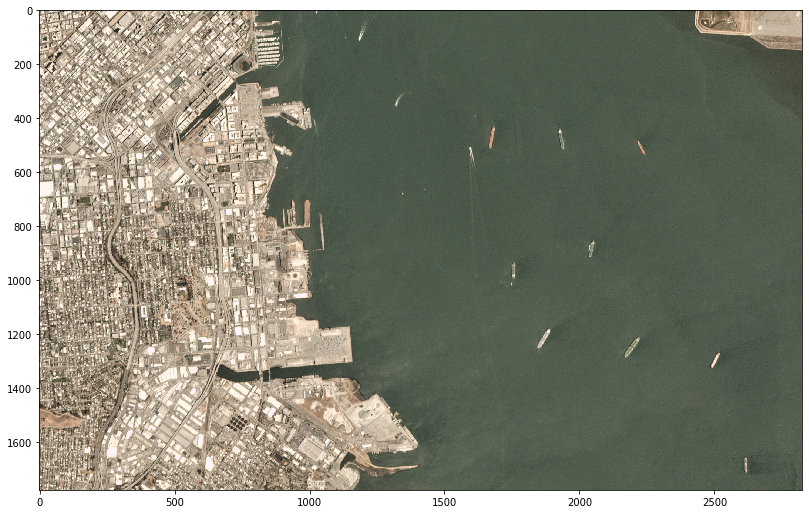

In [0]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [0]:
picture_tensor = picture_tensor.transpose(2,0,1)


In [0]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [0]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [0]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:820 Y:10  [[0.00883454 0.99116546]]


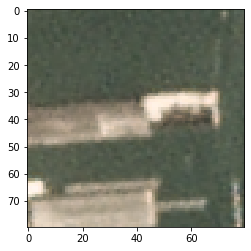

X:2410 Y:20  [[0.07062048 0.92937946]]


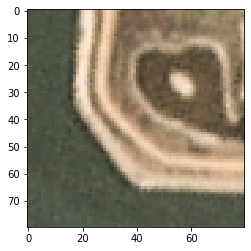

X:2500 Y:40  [[0.04235404 0.95764595]]


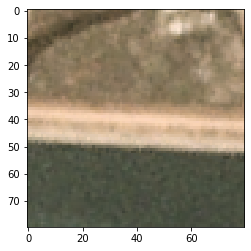

X:1150 Y:50  [[0.00707512 0.9929249 ]]


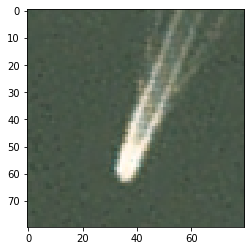

X:820 Y:260  [[0.09573263 0.9042674 ]]


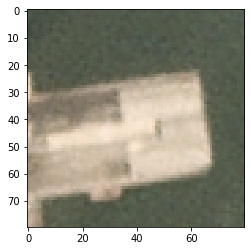

X:1640 Y:410  [[9.177606e-04 9.990822e-01]]


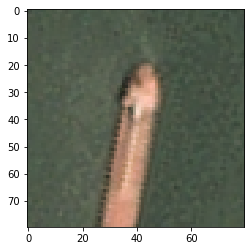

X:1890 Y:420  [[0.00509591 0.99490404]]


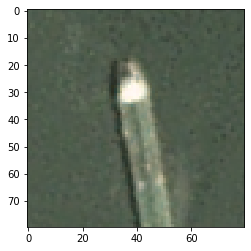

X:2190 Y:460  [[0.01540351 0.98459643]]


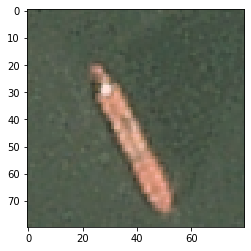

X:850 Y:480  [[0.09277926 0.9072207 ]]


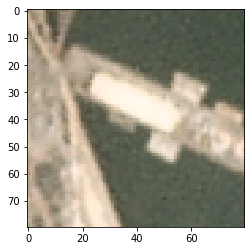

X:1310 Y:640  [[0.07862994 0.92137   ]]


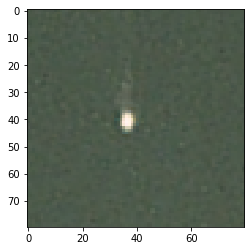

X:900 Y:690  [[0.0086531 0.9913469]]


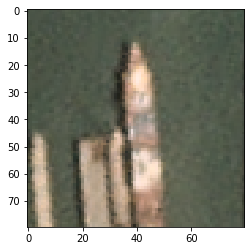

X:1010 Y:770  [[0.01450253 0.98549753]]


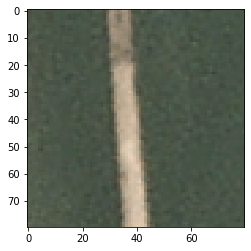

X:2010 Y:830  [[0.04967055 0.9503294 ]]


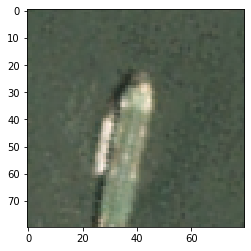

X:1720 Y:920  [[3.5095314e-04 9.9964905e-01]]


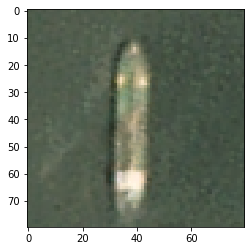

X:1830 Y:1160  [[0.02964625 0.9703537 ]]


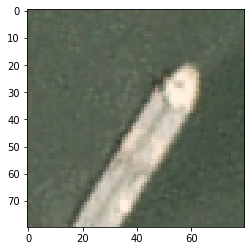

X:2160 Y:1190  [[0.02626682 0.9737332 ]]


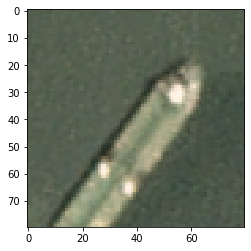

X:2460 Y:1250  [[0.0023044 0.9976956]]


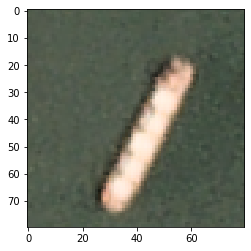

X:2580 Y:1640  [[0.00202901 0.997971  ]]


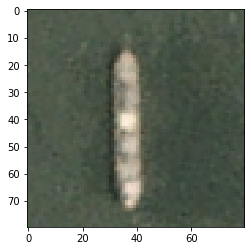

X:1290 Y:1650  [[0.01482937 0.98517066]]


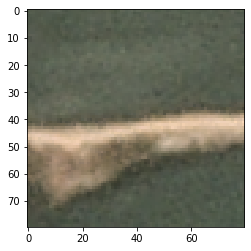

X:2740 Y:1690  

In [0]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [0]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [0]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(1777, 2825, 3)

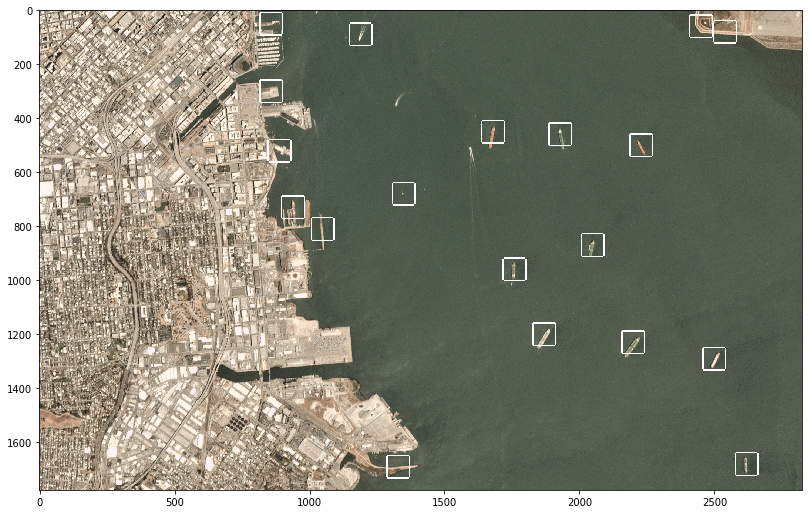

In [0]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()